# To pull the data manually from the website

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
#website(API) - https://coinmarketcap.com/api/
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
import pandas as pd

pd.set_option("display.max.rows",None)

In [4]:
pd.json_normalize(data["data"])

id                                               name  \
0         1                                            Bitcoin   
1      1027                                           Ethereum   
2       825                                        Tether USDt   
3      1839                                                BNB   
4        52                                                XRP   
5      3408                                           USD Coin   
6      2010                                            Cardano   
7        74                                           Dogecoin   
8     11419                                            Toncoin   
9      5426                                             Solana   
10     1958                                               TRON   
11     4943                                                Dai   
12     6636                                           Polkadot   
13     3890                                            Polygon   
14        2                                           Litecoin   
15     3717                                    Wrapped Bitcoin   
16     5994                                          Shiba Inu   
17     1831                                       Bitcoin Cash   
18     1975                                          Chainlink   
19     3957                                       UNUS SED LEO   
20      512                                            Stellar   
21     5805                                          Avalanche   
22     2563                                            TrueUSD   
23      328                                             Monero   
24     3794                                             Cosmos   
25     3897                                                OKB   
26     7083                                            Uniswap   
27     4687                                               BUSD   
28     1321                                   Ethereum Classic   
29     4642                                             Hedera   
30     2280                                           Filecoin   
31     8000                                           Lido DAO   
32     8916                                  Internet Computer   
33    27075                                             Mantle   
34     3635                                             Cronos   
35     3077                                            VeChain   
36     1518                                              Maker   
37    21794                                              Aptos   
38     3155                                              Quant   
39    11840                                           Optimism   
40    11841                                           Arbitrum   
41     6535                                      NEAR Protocol   
42     7278                                               Aave   
43     6719                                          The Graph   
44     2634                                        XDC Network   
45     4030                                           Algorand   
46    19891                                               USDD   
47     4847                                             Stacks   
48     6892                                         MultiversX   
49     2011                                              Tezos   
50    10603                                          Immutable   
51    11092                                       Bitget Token   
52     1765                                                EOS   
53     6783                                      Axie Infinity   
54     4157                                          THORChain   
55     6210                                        The Sandbox   
56     7226                                          Injective   
57     2416                                      Theta Network   
58     3602                                         Bitcoin SV   
59     5690                                      

# Automating the data pull from website & Storing it in csv file

In [5]:

def get_data():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    import pandas as pd

    pd.set_option("display.max.rows",None)
    ]
    [
        ''
    ]
    df = pd.json_normalize(data["data"]) #We are saving the o/p in a dataframe
    df["timestamp"] = pd.to_datetime("now") #We are adding a timestamp col to check when data got updated
    
    
    import os
    
    if not os.path.isfile(r"D:\Data Analysis\Pandas file\Automating Data pull from Crypto Website API\API.csv"):
        df.to_csv(r"D:\Data Analysis\Pandas file\Automating Data pull from Crypto Website API\API.csv", header="column_names")
    else:
        df.to_csv(r"D:\Data Analysis\Pandas file\Automating Data pull from Crypto Website API\API.csv",mode="a",header=False)
        
       

In [6]:
#For loop to run our script every 60sec
#Max limit to hit the API for a single day is 333, hence we put loop no as 333 

from time import sleep

for i in range(333):
    get_data()
    print("Data pulled successfully")
    sleep(60)
exit()

Data pulled successfully
Data pulled successfully


KeyboardInterrupt: 

In [7]:
import pandas as pd
pd.read_csv(r"D:\Data Analysis\Pandas file\Automating Data pull from Crypto Website API\API.csv")


Unnamed: 0     id         name symbol                  slug  \
0            0      1      Bitcoin    BTC               bitcoin   
1            1   1027     Ethereum    ETH              ethereum   
2            2    825  Tether USDt   USDT                tether   
3            3   1839          BNB    BNB                   bnb   
4            4     52          XRP    XRP                   xrp   
5            5   3408     USD Coin   USDC              usd-coin   
6            6   2010      Cardano    ADA               cardano   
7            7     74     Dogecoin   DOGE              dogecoin   
8            8  11419      Toncoin    TON               toncoin   
9            9   5426       Solana    SOL                solana   
10          10   1958         TRON    TRX                  tron   
11          11   4943          Dai    DAI  multi-collateral-dai   
12          12   6636     Polkadot    DOT          polkadot-new   
13          13      2     Litecoin    LTC              litecoin   
14          14   3890      Polygon  MATIC               polygon   
15           0      1      Bitcoin    BTC               bitcoin   
16           1   1027     Ethereum    ETH              ethereum   
17           2    825  Tether USDt   USDT                tether   
18           3   1839          BNB    BNB                   bnb   
19           4     52          XRP    XRP                   xrp   
20           5   3408     USD Coin   USDC              usd-coin   
21           6   2010      Cardano    ADA               cardano   
22           7     74     Dogecoin   DOGE              dogecoin   
23           8  11419      Toncoin    TON               toncoin   
24           9   5426       Solana    SOL                solana   
25          10   1958         TRON    TRX                  tron   
26          11   4943          Dai    DAI  multi-collateral-dai   
27          12   6636     Polkadot    DOT          polkadot-new   
28          13      2     Litecoin    LTC              litecoin   
29          14   3890      Polygon  MATIC               polygon   
30           0      1      Bitcoin    BTC               bitcoin   
31           1   1027     Ethereum    ETH              ethereum   
32           2    825  Tether USDt   USDT                tether   
33           3   1839          BNB    BNB                   bnb   
34           4     52          XRP    XRP                   xrp   
35           5   3408     USD Coin   USDC              usd-coin   
36           6   2010      Cardano    ADA               cardano   
37           7     74     Dogecoin   DOGE              dogecoin   
38           8  11419      Toncoin    TON               toncoin   
39           9   5426       Solana    SOL                solana   
40          10   1958         TRON    TRX                  tron   
41          11   4943          Dai    DAI  multi-collateral-dai   
42          12   6636     Polkadot    DOT          polkadot-new   
43          13   3890      Polygon  MATIC               polygon   
44          14      2     Litecoin    LTC              litecoin   
45           0      1      Bitcoin    BTC               bitcoin   
46           1   1027     Ethereum    ETH              ethereum   
47           2    825  Tether USDt   USDT                tether   
48           3   1839          BNB    BNB                   bnb   
49           4     52          XRP    XRP                   xrp   
50           5   3408     USD Coin   USDC              usd-coin   
51           6   2010      Cardano    ADA               cardano   
52           7     74     Dogecoin   DOGE              dogecoin   
53           8  11419      Toncoin    TON               toncoin   
54           9   5426       Solana    SOL                solana   
55          10   1958         TRON    TRX                  tron   
56          11   4943          Dai    DAI  multi-collateral-dai   
57          12   6636     Polkadot    DOT          polkadot-new   
58          13   3890      Polygon  MATIC          

# Data Cleaning

In [8]:
#Cut shorting decimal places to 2 values

pd.set_option("display.float_format",lambda x: "%.2f" %x)

In [9]:
#There are cols which displays price change for every 1hr, 24hr,7days,30days,60days and 90days
#We are grouping the various coins and getting the average change of values for each time period

df2 = df.groupby("name")[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()

In [10]:
#For better visualization when we convert our df to chart, we use stack() mtd which prints all data in row manner where
#1st is name of coin, 2nd the col name(time period), 3rd the actual value

df3 = df2.stack()
df3

name                                     
BNB          quote.USD.percent_change_1h     -0.01
             quote.USD.percent_change_24h    -0.47
             quote.USD.percent_change_7d      2.51
             quote.USD.percent_change_30d     0.80
             quote.USD.percent_change_60d   -11.21
             quote.USD.percent_change_90d   -14.00
Bitcoin      quote.USD.percent_change_1h      0.14
             quote.USD.percent_change_24h     0.79
             quote.USD.percent_change_7d      4.60
             quote.USD.percent_change_30d     4.23
             quote.USD.percent_change_60d    -9.38
             quote.USD.percent_change_90d    -9.73
Cardano      quote.USD.percent_change_1h     -0.11
             quote.USD.percent_change_24h    -0.17
             quote.USD.percent_change_7d      2.42
             quote.USD.percent_change_30d    -5.39
             quote.USD.percent_change_60d   -19.25
             quote.USD.percent_change_90d   -16.07
Dai          quote.USD.percent_change_1h

In [21]:
#Type of stack mtd would be series, we need to convert it to df for further analysis
#type(df3)
df4 = df3.to_frame(name="values") #By default, 1st col will be taken as index. Rest of the cols will be provided with Values name. 
df4 #if no col names are provided, by default col name would be 0

values
name                                            
BNB         quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h   -0.47
            quote.USD.percent_change_7d     2.51
            quote.USD.percent_change_30d    0.80
            quote.USD.percent_change_60d  -11.21
            quote.USD.percent_change_90d  -14.00
Bitcoin     quote.USD.percent_change_1h     0.14
            quote.USD.percent_change_24h    0.79
            quote.USD.percent_change_7d     4.60
            quote.USD.percent_change_30d    4.23
            quote.USD.percent_change_60d   -9.38
            quote.USD.percent_change_90d   -9.73
Cardano     quote.USD.percent_change_1h    -0.11
            quote.USD.percent_change_24h   -0.17
            quote.USD.percent_change_7d     2.42
            quote.USD.percent_change_30d   -5.39
            quote.USD.percent_change_60d  -19.25
            quote.USD.percent_change_90d  -16.07
Dai         quote.USD.percent_change_1h     0.00
            quote.USD.percent_change_24h   -0.04
            quote.USD.percent_change_7d    -0.05
            quote.USD.percent_change_30d    0.06
            quote.USD.percent_change_60d    0.00
            quote.USD.percent_change_90d    0.03
Dogecoin    quote.USD.percent_change_1h     0.02
            quote.USD.percent_change_24h    0.09
            quote.USD.percent_change_7d     1.99
            quote.USD.percent_change_30d   -1.14
            quote.USD.percent_change_60d  -14.14
            quote.USD.percent_change_90d   -8.40
Ethereum    quote.USD.percent_change_1h    -0.02
            quote.USD.percent_change_24h   -0.21
            quote.USD.percent_change_7d     2.70
            quote.USD.percent_change_30d   -2.16
            quote.USD.percent_change_60d  -13.61
            quote.USD.percent_change_90d  -14.21
Litecoin    quote.USD.percent_change_1h    -0.21
            quote.USD.percent_change_24h   -1.12
            quote.USD.percent_change_7d     9.43
            quote.USD.percent_change_30d    1.06
            quote.USD.percent_change_60d  -29.73
            quote.USD.percent_change_90d  -23.46
Polkadot    quote.USD.percent_change_1h     0.19
            quote.USD.percent_change_24h    0.50
            quote.USD.percent_change_7d     3.18
            quote.USD.percent_change_30d   -8.07
            quote.USD.percent_change_60d  -23.73
            quote.USD.percent_change_90d  -15.93
Polygon     quote.USD.percent_change_1h     0.03
            quote.USD.percent_change_24h    1.46
            quote.USD.percent_change_7d     5.05
            quote.USD.percent_change_30d   -5.51
            quote.USD.percent_change_60d  -30.26
            quote.USD.percent_change_90d  -22.84
Solana      quote.USD.percent_change_1h     0.44
            quote.USD.percent_change_24h    0.25
            quote.USD.percent_change_7d    10.05
            quote.USD.percent_change_30d   -6.03
            quote.USD.percent_change_60d  -22.50
            quote.USD.percent_change_90d   15.70
TRON        quote.USD.percent_change_1h     0.26
            quote.USD.percent_change_24h    0.39
            quote.USD.percent_change_7d     4.99
            quote.USD.percent_change_30d   11.85
            quote.USD.percent_change_60d   -2.52
            quote.USD.percent_change_90d   15.32
Tether USDt quote.USD.percent_change_1h    -0.00
            quote.USD.percent_change_24h   -0.00
            quote.USD.percent_change_7d     0.02
            quote.USD.percent_change_30d    0.07
            quote.USD.percent_change_60d   -0.00
            quote.USD.percent_change_90d    0.01
Toncoin     quote.USD.percent_change_1h     0.96
            quote.USD.percent_change_24h    4.15
            quote.USD.percent_change_7d    31.21
            quote.USD.percent_change_30d   84.97
            quote.USD.percent_change_60d   76.90
            quote.USD.percent_change_90d   80.54
USD Coin    quote.USD.percent_change_1h     0.02
            quote.USD.percent_change_24h    0.02
            quote.USD.pe

In [22]:
#Since name is considered as index by default, we reset the index to get back numbers as index values
df5 = df4.reset_index()
df5

name                       level_1  values
0           BNB   quote.USD.percent_change_1h   -0.01
1           BNB  quote.USD.percent_change_24h   -0.47
2           BNB   quote.USD.percent_change_7d    2.51
3           BNB  quote.USD.percent_change_30d    0.80
4           BNB  quote.USD.percent_change_60d  -11.21
5           BNB  quote.USD.percent_change_90d  -14.00
6       Bitcoin   quote.USD.percent_change_1h    0.14
7       Bitcoin  quote.USD.percent_change_24h    0.79
8       Bitcoin   quote.USD.percent_change_7d    4.60
9       Bitcoin  quote.USD.percent_change_30d    4.23
10      Bitcoin  quote.USD.percent_change_60d   -9.38
11      Bitcoin  quote.USD.percent_change_90d   -9.73
12      Cardano   quote.USD.percent_change_1h   -0.11
13      Cardano  quote.USD.percent_change_24h   -0.17
14      Cardano   quote.USD.percent_change_7d    2.42
15      Cardano  quote.USD.percent_change_30d   -5.39
16      Cardano  quote.USD.percent_change_60d  -19.25
17      Cardano  quote.USD.percent_change_90d  -16.07
18          Dai   quote.USD.percent_change_1h    0.00
19          Dai  quote.USD.percent_change_24h   -0.04
20          Dai   quote.USD.percent_change_7d   -0.05
21          Dai  quote.USD.percent_change_30d    0.06
22          Dai  quote.USD.percent_change_60d    0.00
23          Dai  quote.USD.percent_change_90d    0.03
24     Dogecoin   quote.USD.percent_change_1h    0.02
25     Dogecoin  quote.USD.percent_change_24h    0.09
26     Dogecoin   quote.USD.percent_change_7d    1.99
27     Dogecoin  quote.USD.percent_change_30d   -1.14
28     Dogecoin  quote.USD.percent_change_60d  -14.14
29     Dogecoin  quote.USD.percent_change_90d   -8.40
30     Ethereum   quote.USD.percent_change_1h   -0.02
31     Ethereum  quote.USD.percent_change_24h   -0.21
32     Ethereum   quote.USD.percent_change_7d    2.70
33     Ethereum  quote.USD.percent_change_30d   -2.16
34     Ethereum  quote.USD.percent_change_60d  -13.61
35     Ethereum  quote.USD.percent_change_90d  -14.21
36     Litecoin   quote.USD.percent_change_1h   -0.21
37     Litecoin  quote.USD.percent_change_24h   -1.12
38     Litecoin   quote.USD.percent_change_7d    9.43
39     Litecoin  quote.USD.percent_change_30d    1.06
40     Litecoin  quote.USD.percent_change_60d  -29.73
41     Litecoin  quote.USD.percent_change_90d  -23.46
42     Polkadot   quote.USD.percent_change_1h    0.19
43     Polkadot  quote.USD.percent_change_24h    0.50
44     Polkadot   quote.USD.percent_change_7d    3.18
45     Polkadot  quote.USD.percent_change_30d   -8.07
46     Polkadot  quote.USD.percent_change_60d  -23.73
47     Polkadot  quote.USD.percent_change_90d  -15.93
48      Polygon   quote.USD.percent_change_1h    0.03
49      Polygon  quote.USD.percent_change_24h    1.46
50      Polygon   quote.USD.percent_change_7d    5.05
51      Polygon  quote.USD.percent_change_30d   -5.51
52      Polygon  quote.USD.percent_change_60d  -30.26
53      Polygon  quote.USD.percent_change_90d  -22.84
54       Solana   quote.USD.percent_change_1h    0.44
55       Solana  quote.USD.percent_change_24h    0.25
56       Solana   quote.USD.percent_change_7d   10.05
57       Solana  quote.USD.percent_change_30d   -6.03
58       Solana  quote.USD.percent_change_60d  -22.50
59       Solana  quote.USD.percent_change_90d   15.70
60         TRON   quote.USD.percent_change_1h    0.26
61         TRON  quote.USD.percent_change_24h    0.39
62         TRON   quote.USD.percent_change_7d    4.99
63         TRON  quote.USD.percent_change_30d   11.85
64         TRON  quote.USD.percent_change_60d   -2.52
65         TRON  quote.USD.percent_change_90d   15.32
66  Tether USDt   quote.USD.percent_change_1h   -0.00
67  Tether USDt  quote.USD.percent_change_24h   -0.00
68  Tether USDt   quote.USD.percent_change_7d    0.02
69  Tether USDt  quote.USD.percent_change_30d    0.07
70  Tether USDt  quote.USD.percent_change_60d   -0.00
71  Tether USDt  quote.USD.percent_change_90d    0.01
72      Toncoin   quote.USD.percent_change_1h    0.96
73      Toncoin

In [23]:
#Renaming the price change description cols from level_1 to "Price Change Desc"
df6 = df5.rename(columns={"level_1":"Price Change Desc"})
df6

name             Price Change Desc  values
0           BNB   quote.USD.percent_change_1h   -0.01
1           BNB  quote.USD.percent_change_24h   -0.47
2           BNB   quote.USD.percent_change_7d    2.51
3           BNB  quote.USD.percent_change_30d    0.80
4           BNB  quote.USD.percent_change_60d  -11.21
5           BNB  quote.USD.percent_change_90d  -14.00
6       Bitcoin   quote.USD.percent_change_1h    0.14
7       Bitcoin  quote.USD.percent_change_24h    0.79
8       Bitcoin   quote.USD.percent_change_7d    4.60
9       Bitcoin  quote.USD.percent_change_30d    4.23
10      Bitcoin  quote.USD.percent_change_60d   -9.38
11      Bitcoin  quote.USD.percent_change_90d   -9.73
12      Cardano   quote.USD.percent_change_1h   -0.11
13      Cardano  quote.USD.percent_change_24h   -0.17
14      Cardano   quote.USD.percent_change_7d    2.42
15      Cardano  quote.USD.percent_change_30d   -5.39
16      Cardano  quote.USD.percent_change_60d  -19.25
17      Cardano  quote.USD.percent_change_90d  -16.07
18          Dai   quote.USD.percent_change_1h    0.00
19          Dai  quote.USD.percent_change_24h   -0.04
20          Dai   quote.USD.percent_change_7d   -0.05
21          Dai  quote.USD.percent_change_30d    0.06
22          Dai  quote.USD.percent_change_60d    0.00
23          Dai  quote.USD.percent_change_90d    0.03
24     Dogecoin   quote.USD.percent_change_1h    0.02
25     Dogecoin  quote.USD.percent_change_24h    0.09
26     Dogecoin   quote.USD.percent_change_7d    1.99
27     Dogecoin  quote.USD.percent_change_30d   -1.14
28     Dogecoin  quote.USD.percent_change_60d  -14.14
29     Dogecoin  quote.USD.percent_change_90d   -8.40
30     Ethereum   quote.USD.percent_change_1h   -0.02
31     Ethereum  quote.USD.percent_change_24h   -0.21
32     Ethereum   quote.USD.percent_change_7d    2.70
33     Ethereum  quote.USD.percent_change_30d   -2.16
34     Ethereum  quote.USD.percent_change_60d  -13.61
35     Ethereum  quote.USD.percent_change_90d  -14.21
36     Litecoin   quote.USD.percent_change_1h   -0.21
37     Litecoin  quote.USD.percent_change_24h   -1.12
38     Litecoin   quote.USD.percent_change_7d    9.43
39     Litecoin  quote.USD.percent_change_30d    1.06
40     Litecoin  quote.USD.percent_change_60d  -29.73
41     Litecoin  quote.USD.percent_change_90d  -23.46
42     Polkadot   quote.USD.percent_change_1h    0.19
43     Polkadot  quote.USD.percent_change_24h    0.50
44     Polkadot   quote.USD.percent_change_7d    3.18
45     Polkadot  quote.USD.percent_change_30d   -8.07
46     Polkadot  quote.USD.percent_change_60d  -23.73
47     Polkadot  quote.USD.percent_change_90d  -15.93
48      Polygon   quote.USD.percent_change_1h    0.03
49      Polygon  quote.USD.percent_change_24h    1.46
50      Polygon   quote.USD.percent_change_7d    5.05
51      Polygon  quote.USD.percent_change_30d   -5.51
52      Polygon  quote.USD.percent_change_60d  -30.26
53      Polygon  quote.USD.percent_change_90d  -22.84
54       Solana   quote.USD.percent_change_1h    0.44
55       Solana  quote.USD.percent_change_24h    0.25
56       Solana   quote.USD.percent_change_7d   10.05
57       Solana  quote.USD.percent_change_30d   -6.03
58       Solana  quote.USD.percent_change_60d  -22.50
59       Solana  quote.USD.percent_change_90d   15.70
60         TRON   quote.USD.percent_change_1h    0.26
61         TRON  quote.USD.percent_change_24h    0.39
62         TRON   quote.USD.percent_change_7d    4.99
63         TRON  quote.USD.percent_change_30d   11.85
64         TRON  quote.USD.percent_change_60d   -2.52
65         TRON  quote.USD.percent_change_90d   15.32
66  Tether USDt   quote.USD.percent_change_1h   -0.00
67  Tether USDt  quote.USD.percent_change_24h   -0.00
68  Tether USDt   quote.USD.percent_change_7d    0.02
69  Tether USDt  quote.USD.percent_change_30d    0.07
70  Tether USDt  quote.USD.percent_change_60d   -0.00
71  Tether USDt  quote.USD.percent_change_90d    0.01
72      Toncoin   quote.USD.percent_change_1h    0.96
73      Toncoin

In [31]:
#Renaming the Price change desc col so it would look better in chart
df6["Price Change Desc"] = df6["Price Change Desc"].replace(["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"],["1hr","24hr","7d","30d","60d","90d"])
df6

name Price Change Desc  values
0           BNB               1hr   -0.01
1           BNB              24hr   -0.47
2           BNB                7d    2.51
3           BNB               30d    0.80
4           BNB               60d  -11.21
5           BNB               90d  -14.00
6       Bitcoin               1hr    0.14
7       Bitcoin              24hr    0.79
8       Bitcoin                7d    4.60
9       Bitcoin               30d    4.23
10      Bitcoin               60d   -9.38
11      Bitcoin               90d   -9.73
12      Cardano               1hr   -0.11
13      Cardano              24hr   -0.17
14      Cardano                7d    2.42
15      Cardano               30d   -5.39
16      Cardano               60d  -19.25
17      Cardano               90d  -16.07
18          Dai               1hr    0.00
19          Dai              24hr   -0.04
20          Dai                7d   -0.05
21          Dai               30d    0.06
22          Dai               60d    0.00
23          Dai               90d    0.03
24     Dogecoin               1hr    0.02
25     Dogecoin              24hr    0.09
26     Dogecoin                7d    1.99
27     Dogecoin               30d   -1.14
28     Dogecoin               60d  -14.14
29     Dogecoin               90d   -8.40
30     Ethereum               1hr   -0.02
31     Ethereum              24hr   -0.21
32     Ethereum                7d    2.70
33     Ethereum               30d   -2.16
34     Ethereum               60d  -13.61
35     Ethereum               90d  -14.21
36     Litecoin               1hr   -0.21
37     Litecoin              24hr   -1.12
38     Litecoin                7d    9.43
39     Litecoin               30d    1.06
40     Litecoin               60d  -29.73
41     Litecoin               90d  -23.46
42     Polkadot               1hr    0.19
43     Polkadot              24hr    0.50
44     Polkadot                7d    3.18
45     Polkadot               30d   -8.07
46     Polkadot               60d  -23.73
47     Polkadot               90d  -15.93
48      Polygon               1hr    0.03
49      Polygon              24hr    1.46
50      Polygon                7d    5.05
51      Polygon               30d   -5.51
52      Polygon               60d  -30.26
53      Polygon               90d  -22.84
54       Solana               1hr    0.44
55       Solana              24hr    0.25
56       Solana                7d   10.05
57       Solana               30d   -6.03
58       Solana               60d  -22.50
59       Solana               90d   15.70
60         TRON               1hr    0.26
61         TRON              24hr    0.39
62         TRON                7d    4.99
63         TRON               30d   11.85
64         TRON               60d   -2.52
65         TRON               90d   15.32
66  Tether USDt               1hr   -0.00
67  Tether USDt              24hr   -0.00
68  Tether USDt                7d    0.02
69  Tether USDt               30d    0.07
70  Tether USDt               60d   -0.00
71  Tether USDt               90d    0.01
72      Toncoin               1hr    0.96
73      Toncoin              24hr    4.15
74      Toncoin                7d   31.21
75      Toncoin               30d   84.97
76      Toncoin               60d   76.90
77      Toncoin               90d   80.54
78     USD Coin               1hr    0.02
79     USD Coin              24hr    0.02
80     USD Coin                7d    0.01
81     USD Coin               30d    0.03
82     USD Coin               60d    0.02
83     USD Coin               90d    0.02
84          XRP               1hr   -0.61
85          XRP              24hr    1.52
86          XRP                7d    7.76
87          XRP               30d   -1.27
88          XRP               60d  -33.82
89          XRP               90d    0.34

# Visualizing the data frame

In [32]:
import seaborn as sea

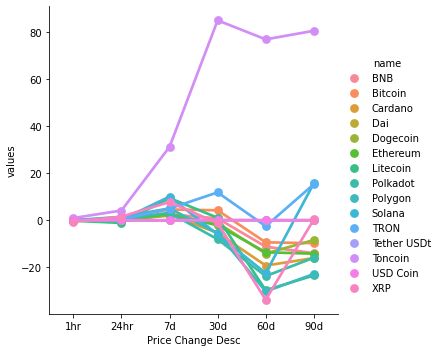

In [34]:
#plotting the above df in chart
sea.catplot(x="Price Change Desc", y="values", hue="name", data=df6, kind="point")

In [37]:
#We are filtering only bitcoin from our df and are going to plot it in a chart
df7=df6[df6["name"].str.contains("Bitcoin")]
df7

name Price Change Desc  values
6   Bitcoin               1hr    0.14
7   Bitcoin              24hr    0.79
8   Bitcoin                7d    4.60
9   Bitcoin               30d    4.23
10  Bitcoin               60d   -9.38
11  Bitcoin               90d   -9.73

<AxesSubplot:xlabel='Price Change Desc', ylabel='values'>

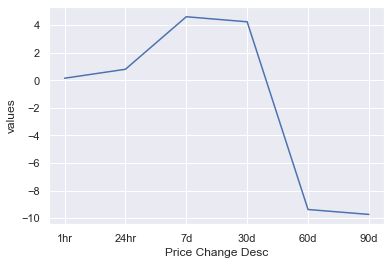

In [39]:
#We are plotting the bitcoin df in line chart
sea.set_theme(style="darkgrid")
sea.lineplot(x="Price Change Desc", y="values", data=df7)